In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# path to hdf5 file
#path_hdf5 = '/media/philipp/8044E96044E95984/data/time_series/modis_smooth.h5'

#hdf5_modis = h5py.File(path_hdf5, 'r')

In [3]:
# path to hdf5 file
path_hdf5 = '/home/philipp/Data/modis/modis_smooth.h5'

hdf5_modis = h5py.File(path_hdf5, 'r')

In [237]:
wht = hdf5_modis['whittaker']

In [5]:
wht[90,1000,:]

array([0.34783572, 0.35252702, 0.35720897, ..., 0.3214038 , 0.31790933,
       0.31441486], dtype=float32)

In [96]:
whit = np.array(wht[650,703,:])
#np.save('/home/philipp/Data/modis/modis_90_500.npy', whit)

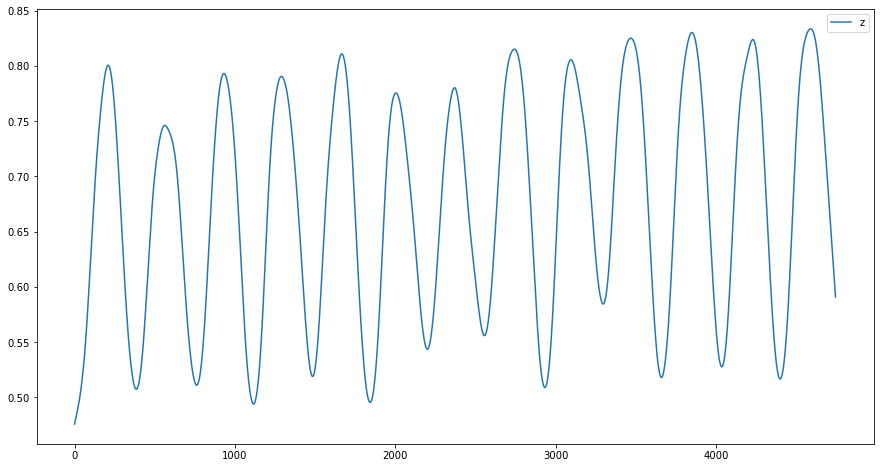

In [89]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[650,704,:], label='z')
ax.legend()

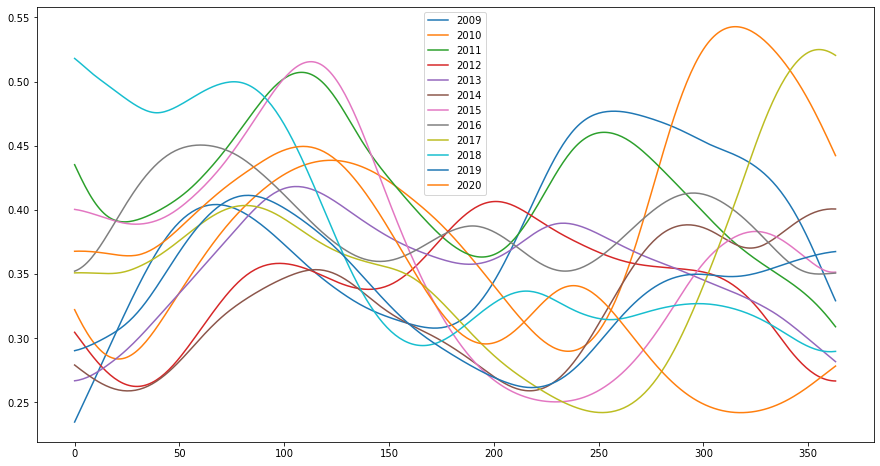

In [240]:
x = 0
y = 365
z = wht[0,1584,:]

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z[x+1:x+y], label='2009')
ax.plot(z[x+y*1+1:x+y*2], label='2010')
ax.plot(z[x+y*2+1:x+y*3], label='2011')
ax.plot(z[x+y*3+1:x+y*4], label='2012')
ax.plot(z[x+y*4+1:x+y*5], label='2013')
ax.plot(z[x+y*5+1:x+y*6], label='2014')
ax.plot(z[x+y*6+1:x+y*7], label='2015')
ax.plot(z[x+y*7+1:x+y*8], label='2016')
ax.plot(z[x+y*8+1:x+y*9], label='2017')
ax.plot(z[x+y*9+1:x+y*10], label='2018')
ax.plot(z[x+y*10+1:x+y*11], label='2019')
ax.plot(z[x+y*11+1:x+y*12], label='2020')
ax.legend()

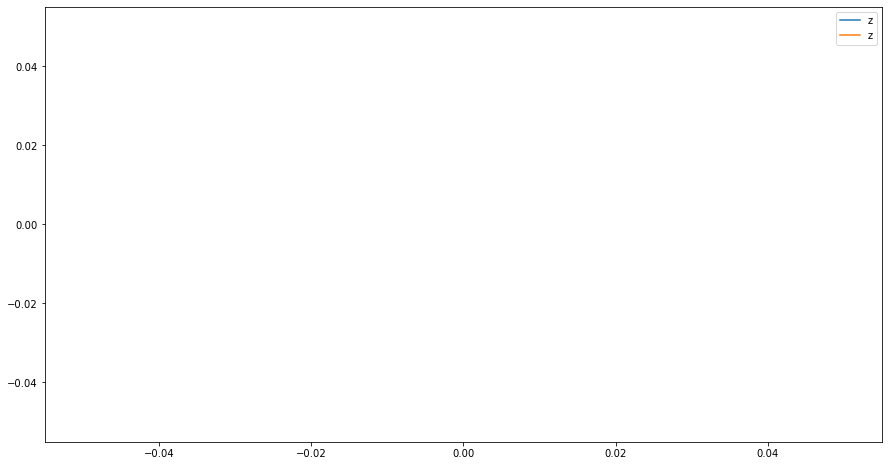

In [238]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[0,1584,:][x+y*8+1:x+y*9], label='z')
ax.plot(wht[0,1584,:][x+y*9+1:x+y*10], label='z')
ax.legend()

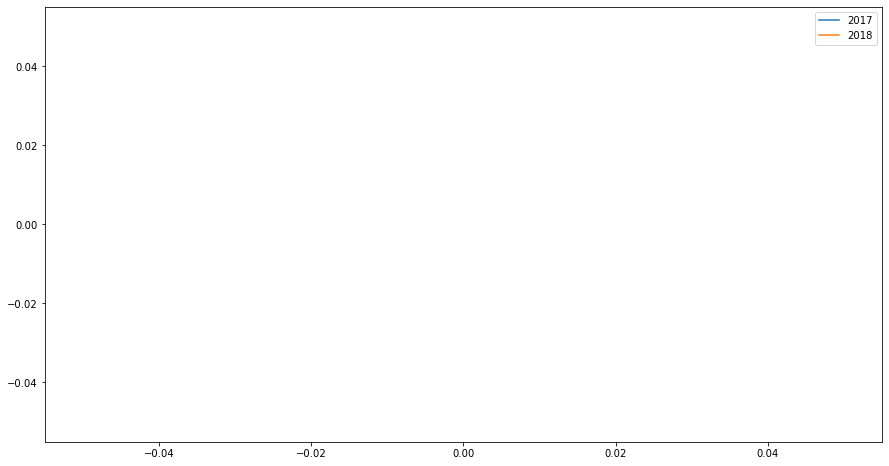

In [239]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[0,1584,:][x+y*8+1+100:x+y*9+100], label='2017')
ax.plot(wht[0,1584,:][x+y*9+1+100:x+y*10+100], label='2018')
ax.legend()

In [170]:
whit = np.array(wht[0,0,:])

x = 0
y = 365

pixel = {}

for i in range(0,12):
    pixel[str(2009+i)] = np.array(whit[x+y*i+1:x+y*(i+1)])
    
pixel_end = {}

for i in range(0,12):
    pixel_end[str(2009+i)] = np.array(whit[x+y*i+1+100:x+y*(i+1)+100])

In [171]:
print(pixel['2010'].min())
print(pixel['2010'].max())
print((pixel['2010'].max()-pixel['2010'].min())*0.2 + pixel['2010'].min())

0.51274365
0.90891284
0.5919774889945983


In [13]:
# get SOS

idx_min = np.where(pixel['2010'] == pixel['2010'].min())[0][0]
idx_max = np.where(pixel['2010'] == pixel['2010'].max())[0][0]

pix_20 = (pixel['2010'].max()-pixel['2010'].min())*0.2 + pixel['2010'].min()

# get EOS

idxe_min = np.where(pixel_end['2010'] == pixel_end['2010'].min())[0][0]
idxe_max = np.where(pixel_end['2010'] == pixel_end['2010'].max())[0][0]

pixe_20 = (pixel_end['2010'].max()-pixel_end['2010'].min())*0.2 + pixel_end['2010'].min()

In [14]:
# find index of 20% -> SOS

for i in range(idx_min+1, idx_max):
    if pixel['2010'][i] >= pix_20:
        idx_20 = i
        print(i)
        break
        
# find index of 20% -> EOS

for i in range(idxe_min-1, idxe_max, -1):
    if pixel_end['2010'][i] >= pixe_20:
        idxe_20 = i+150
        print(i+150)
        break

69
349


In [15]:
print(idx_20)
print(idx_max)
print(idxe_20)

69
204
349


In [243]:
def get_pheno_sos(pixel, year):
    
    if pixel[year].all() == 0:
        idx_20 = -1
        
    else:
        # find index of 20% -> SOS

        idx_max = np.argmax(pixel[year])
        maximum = pixel[year][idx_max]
        
        if idx_max == 0:
            idx_max = 364
            
        idx_min = np.argmin(pixel[year][:idx_max])
        minimum = pixel[year][idx_min]

        # calculate SOS
        pix_20 = (maximum-minimum)*0.2 + minimum

        # find index of SOS
        idx_20 = (np.abs(pixel[year][:idx_max] - pix_20)).argmin()
            
    return idx_20

In [ ]:
def get_pheno(pixel, year, typ='SOS'):
    
    idx_20 = -1
    
    # find index of 20% -> SOS
    if typ == 'SOS':
        
        idx_max = np.argmax(pixel[year])
        maximum = pixel[year][idx_max]
        
        idx_min = np.argmin(pixel[year][:idx_max])
        minimum = pixel[year][idx_min]
        
        offset = 0
        
    elif typ == 'EOS':
        
        idx_min = np.argmin(pixel[year])
        minimum = pixel[year][idx_min]
        
        idx_max = np.argmin(pixel[year][:idx_min])
        maximum = pixel[year][idx_max]
        
        offset = 100

    pix_20 = (maximum-minimum)*0.2 + minimum
    
    print(minimum, pix_20, maximum)
    
    # find nearest value
    idx_20 = (np.abs(pixel[year][:idx_max] - pix_20)).argmin()
    
    #for i in range(idx_min, idx_max, temp):
    #    if pixel[year][i] >= pix_20:
    #        idx_20 = i+offset
    #        break
            
    return idx_20

In [181]:
np.argmin(pixel['2018'][:np.argmax(pixel['2018'])])

8

In [182]:
np.argmax(pixel['2018'])

186

In [190]:
# SOS

for year in range(2009, 2021):
    idx_20 = get_pheno_sos(pixel,str(year))
    print(idx_20)

44
67
83
81
64
65
67
59
52
64
55
64


In [165]:
%%time
# SOS
for i in range(1000):
    for year in range(2009, 2021):
        get_pheno(pixel,str(year),typ='SOS')

CPU times: user 87.8 ms, sys: 8.01 ms, total: 95.8 ms
Wall time: 86.3 ms


In [180]:
get_pheno(pixel,str(2012),typ='SOS')

346

In [155]:
# EOS
get_pheno(pixel_end,'2017',typ='EOS')

0.6309635 0.6309666991233825 0.6309795


-1

In [195]:
hdf5_modis.close()

In [ ]:
###

In [31]:
start_year = 2009
end_year = 2021

In [38]:
# path to hdf5 file
path_hdf5 = '/home/philipp/Data/modis/modis_smooth.h5'

# create / open file
hdf5_modis = h5py.File(path_hdf5, 'a')

if not os.path.isfile(path_hdf5):
    print('file not found -> creating file')
    
# create dataset
hdf5_modis.create_dataset('SOS',\
                       (hdf5_modis['whittaker'].shape[0], hdf5_modis['whittaker'].shape[1],\
                       (end_year-start_year)), dtype=np.int16)

# create dataset
hdf5_modis.create_dataset('MOS',\
                       (hdf5_modis['whittaker'].shape[0], hdf5_modis['whittaker'].shape[1],\
                       (end_year-start_year)), dtype=np.int16)

# create dataset
hdf5_modis.create_dataset('EOS',\
                       (hdf5_modis['whittaker'].shape[0], hdf5_modis['whittaker'].shape[1],\
                       (end_year-start_year)), dtype=np.int16)

# create dataset
hdf5_modis.create_dataset('LOS',\
                       (hdf5_modis['whittaker'].shape[0], hdf5_modis['whittaker'].shape[1],\
                       (end_year-start_year)), dtype=np.int16)

<HDF5 dataset "LOS": shape (1299, 1864, 12), type "<i2">

In [196]:
# path to hdf5 file
path_hdf5 = '/home/philipp/Data/modis/modis_smooth.h5'

# create / open file
hdf5_modis = h5py.File(path_hdf5, 'a')


In [191]:
def clip_years(arr, start_year, end_year, typ='SOS'):
    
    if typ == 'SOS':
        offset = 0
    elif typ == 'SOS':
        offset = 100
    
    x = 0
    y = 365

    pixel = {}

    for i in range(0,end_year-start_year):
        pixel[start_year+i] = np.array(arr[x+y*i+1+offset:x+y*(i+1)+offset])
        
    return pixel
    #pixel_end = {}

    #for i in range(0,end_year-start_year):
    #    pixel_end[start_year+i] = np.array(whit[x+y*i+1+150:x+y*(i+1)+150])

In [245]:
arr

array([0.23120826, 0.2346849 , 0.23816268, ..., 0.39712012, 0.39590174,
       0.3946834 ], dtype=float32)

In [244]:
arr = np.array(hdf5_modis['whittaker'][0,1584,:])
temp = clip_years(arr, start_year, end_year, typ='SOS')
ph = get_pheno_sos(temp, 2018)
print(ph)

221


In [ ]:
typ = 'SOS'

# y-coordinates
for y in range(hdf5_modis['whittaker'].shape[0]):
    print(y)
    # x-coordinates
    for x in range(hdf5_modis['whittaker'].shape[1]):
        #print(x)
        
        pixel = np.array(hdf5_modis['whittaker'][y,x,:])

        pixel_years = clip_years(pixel, start_year, end_year, typ=typ)
            
        # years
        for year in range(start_year, end_year):
            #print(year)
            
            # SOS
            hdf5_modis[typ][y,x,year-start_year] = get_pheno_sos(pixel_years, year)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156


In [233]:
x

1584

In [78]:
hdf5_modis['SOS'][:,:,0].shape

(1299, 1864)

In [73]:
#############################

In [80]:
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr

In [74]:
def array2raster(newRasterfn, dataset, array, dtype, offsetX=0, offsetY=0):
    """
    save GTiff file from numpy.array
    input:
        newRasterfn: save file name
        dataset : original tif file
        array : numpy.array
        dtype: Byte or Float32.
    """
    cols = array.shape[1]
    rows = array.shape[0]
    originX, pixelWidth, b, originY, d, pixelHeight = dataset.GetGeoTransform()
    originX += offsetX
    originY += offsetY

    driver = gdal.GetDriverByName('GTiff')

    # set data type to save.
    GDT_dtype = gdal.GDT_Unknown
    if dtype == "Byte": 
        GDT_dtype = gdal.GDT_Byte
    elif dtype == "Int16":
        GDT_dtype = gdal.GDT_Int16
    elif dtype == "Float32":
        GDT_dtype = gdal.GDT_Float32
    else:
        print("Not supported data type.")

    # set number of band.
    if array.ndim == 2:
        band_num = 1
    else:
        band_num = array.shape[2]

    outRaster = driver.Create(newRasterfn, cols, rows, band_num, GDT_dtype)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))

    # Loop over all bands.
    for b in range(band_num):
        outband = outRaster.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        if band_num == 1:
            outband.WriteArray(array)
        else:
            outband.WriteArray(array[:,:,b])

    # setteing srs from input tif file.
    prj=dataset.GetProjection()
    outRasterSRS = osr.SpatialReference(wkt=prj)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

In [82]:
# convert numpy array to geotiff files
for i in range(12):
    # create input path
    path_in = '/home/philipp/Data/modis/raw/MOD13Q1.A2009001.250m_16_days_NDVI.tif'
    # create output path
    path_out = '/home/philipp/Data/modis/georgia_sos_{}.tif'.format(2009+i)
    # open coresponding ortho file
    dataset = gdal.Open(path_in, gdal.GA_ReadOnly)
    # create rater (GeoTiff) file out of numpy array (prediction) and coresponding ortho file information  
    array2raster(newRasterfn=path_out, dataset=dataset, array=hdf5_modis['SOS'][:,:,i], dtype='Int16', offsetX=0, offsetY=0)

print('finished')

ERROR 1: PROJ: createGeodeticReferenceFrame: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: createGeodeticReferenceFrame: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/co

finished


ERROR 1: PROJ: createGeodeticReferenceFrame: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: createGeodeticReferenceFrame: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_as_wkt: Open of /home/philipp/software/conda3/envs/modis/share/proj failed
ERROR 1: PROJ: proj_create_from_wkt: Open of /home/philipp/software/co

In [ ]:
###############################

In [39]:
hdf5_modis['SOS'][y,x,:]

<HDF5 dataset "SOS": shape (1299, 1864, 12), type "<i2">

In [33]:
hdf5_modis.keys()

<KeysViewHDF5 ['whittaker']>

In [36]:
hdf5_modis['whittaker'].shape[0]

1299

In [6]:
img = np.array(wht[:,:,100])

In [7]:
np.argmax(img,axis=0)

array([  57,  122,   93, ..., 1172, 1173, 1089])

In [8]:
np.argmax(img,axis=1)

array([1120, 1424, 1424, ...,  270,  271,  134])

In [9]:
img[122,1120]

0.522386

(array([[1184.,    4.,    3., ...,   10.,   82.,    4.],
        [1178.,    2.,    3., ...,   11.,   82.,    6.],
        [1178.,    2.,    2., ...,    4.,   91.,    5.],
        ...,
        [ 160.,   83.,  107., ...,   98.,   61.,    3.],
        [ 168.,   69.,  113., ...,  103.,   52.,    5.],
        [ 165.,   71.,  110., ...,  113.,   41.,    4.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 1864 BarContainer objects>)

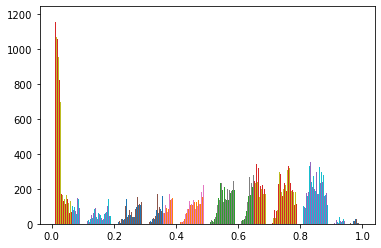

In [36]:
plt.hist(img)

(array([[1.000e+00, 1.000e+00, 1.183e+03, ..., 7.100e+01, 1.100e+01,
         0.000e+00],
        [0.000e+00, 3.000e+00, 1.177e+03, ..., 7.100e+01, 1.100e+01,
         1.000e+00],
        [1.000e+00, 1.000e+00, 1.175e+03, ..., 8.000e+01, 8.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 1.210e+02, 1.000e+02, ..., 7.700e+01, 6.000e+00,
         2.000e+00],
        [1.000e+00, 1.150e+02, 1.130e+02, ..., 7.600e+01, 4.000e+00,
         0.000e+00],
        [1.000e+00, 1.090e+02, 1.250e+02, ..., 8.900e+01, 1.000e+00,
         0.000e+00]]),
 array([-0.3       , -0.17000002, -0.04000001,  0.08999999,  0.22      ,
         0.35      ,  0.48      ,  0.61      ,  0.74      ,  0.87      ,
         1.        ], dtype=float32),
 <a list of 1864 BarContainer objects>)

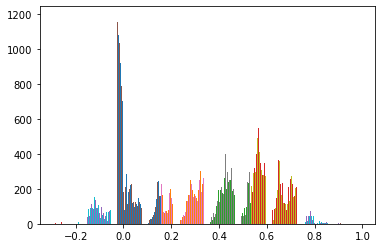

In [10]:
plt.hist(img)

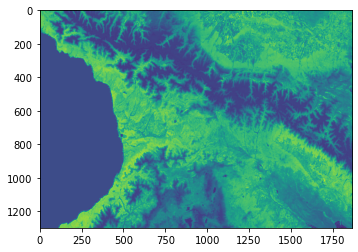

In [11]:
plt.imshow(img)

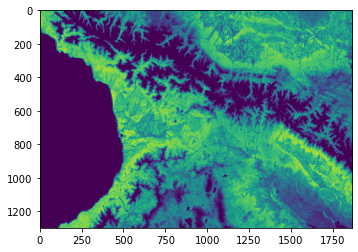

In [34]:
plt.imshow(img)

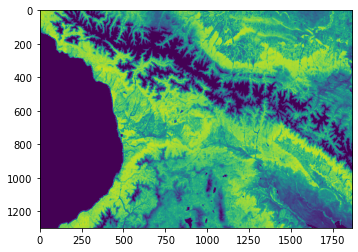

In [37]:
plt.imshow(img)

In [11]:
wht[:,:,100].shape

(1299, 1864)